#### Лаба 3

#### задачи траекторного управления



In [3]:
import sympy as sm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from IPython.display import display, Math
import inspect

In [4]:
# robot model parameters
m = 2.8 # in kg
J = 3 # in kg*m

In [5]:
x, y, omega, alpha, vx, vy, Fx, Fy, M  = sm.symbols("x y omega alpha vx vy Fx Fy M")
A = sm.Matrix( [[1/m,0,0],[0,1/m,0],[0,0,1/J]] )
z = sm.Matrix( [[vx],[vy],[omega]] ) # in m frame
u = sm.Matrix( [[Fx],[Fy],[M]] )
R = sm.Matrix( [[sm.cos(alpha),sm.sin(alpha)],[-sm.sin(alpha),sm.cos(alpha)]] )

In [6]:
def display_expr(expr):
    frame = inspect.currentframe()
    frame = inspect.getouterframes(frame)[1]
    string = inspect.getframeinfo(frame[0]).code_context[0].strip()
    args = string[string.find('(') + 1:-1].split(',')
    
    names = []
    for i in args:
        if i.find('=') != -1:
            names.append(i.split('=')[1].strip())
        
        else:
            names.append(i)
    if names[0]=='phi_1':
        names[0] = '\\varphi_1'
    if names[0]=='phi_2':
        names[0] = '\\varphi_2'
    if names[0]=='phi_3':
        names[0] = '\\varphi_3'
    expr = expr.xreplace({n : round(n, 3) for n in expr.atoms(sm.Number)})
    str = sm.latex(expr)
    # str = str.replace('\\theta','\\vartheta')
    str = str.replace('vx','v_x')
    str = str.replace('vy','v_y')
    str = str.replace('Fx','F_x')
    str = str.replace('Fy','F_y')
    
    display(Math(names[0] + '=' + str))    

In [7]:
Au = A*u
display_expr(Au)

<IPython.core.display.Math object>

In [8]:
v = sm.transpose(R)*sm.Matrix([[vx],[vy]])
display_expr(v)

<IPython.core.display.Math object>

In [9]:
a = (1/m)*sm.transpose(R)*sm.Matrix([[Fx],[Fy]])
display_expr(a)

<IPython.core.display.Math object>

In [52]:
#trajectory
x0 = -7
y0 = 4
alpha0 = 3*np.pi/4
vs_des1 = 1 
vs_des2 = 3
vs_des3 = 5

R1 = 3
xc1 = -3
yc1 = 2
R3 = 5
xc3 = 12
yc3 = 2
phi_1 = (x-xc1)**2+(y-yc1)**2-R1**2
phi_2 = -2*sm.cos(0.5*x+0.3)+y-2
phi_3 = (x-xc3)**2 + (y-yc3)**2 - R3**2
display_expr(phi_1)
display_expr(phi_2)
display_expr(phi_3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
calc_phi_1_y = sm.solve(phi_1, y)
display(Math(sm.latex(calc_phi_1_y)))

<IPython.core.display.Math object>

In [12]:
calc_phi_2_y = sm.solve(phi_2, y)
display(Math(sm.latex(calc_phi_2_y)))

<IPython.core.display.Math object>

In [13]:
calc_phi_3_y = sm.solve(phi_3, y)
display(Math(sm.latex(calc_phi_3_y)))

<IPython.core.display.Math object>

In [16]:
params = tuple(calc_phi_1_y[0].free_symbols)
print(params)
fun_calc_phi_11_y = sm.lambdify(params, calc_phi_1_y[0], modules='numpy')
params = tuple(calc_phi_1_y[1].free_symbols)
print(params)
fun_calc_phi_12_y = sm.lambdify(params, calc_phi_1_y[1], modules='numpy')

params = tuple(calc_phi_2_y[0].free_symbols)
print(params)
fun_calc_phi_2_y = sm.lambdify(params, calc_phi_2_y[0], modules='numpy')

params = tuple(calc_phi_3_y[0].free_symbols)
print(params)
fun_calc_phi_31_y = sm.lambdify(params, calc_phi_3_y[0], modules='numpy')
params = tuple(calc_phi_3_y[1].free_symbols)
print(params)
fun_calc_phi_32_y = sm.lambdify(params, calc_phi_3_y[1], modules='numpy')

(x,)
(x,)
(x,)
(x,)
(x,)


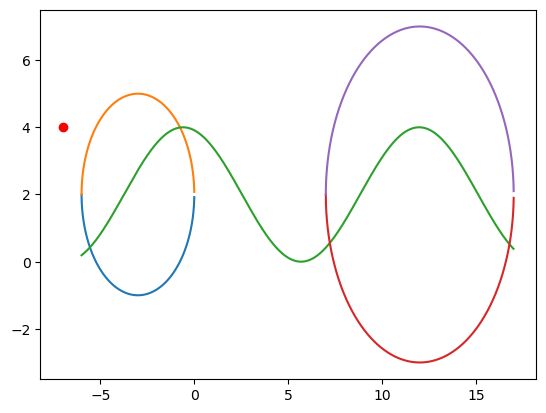

In [59]:
x1 = np.arange(xc1-R1,xc1+R1,1e-3)
x2 = np.arange(-6,17,1e-2)
x3 = np.arange(xc3-R3,xc3+R3,1e-3)
plt.plot(x1,fun_calc_phi_11_y(x1))
plt.plot(x1,fun_calc_phi_12_y(x1))
plt.plot(x2,fun_calc_phi_2_y(x2))
plt.plot(x3,fun_calc_phi_31_y(x3))
plt.plot(x3,fun_calc_phi_32_y(x3))
plt.plot(x0,y0,"or")

In [ ]:
#

$\Upsilon(x,y)$ = $\begin{bmatrix} \frac{\partial \psi(x,y)}{\partial x} & \frac{\partial \psi(x,y)}{\partial y} \\ & \\\frac{\partial \varphi(x,y)}{\partial x} & \frac{\partial \varphi(x,y)}{\partial y} \end{bmatrix}$

In [45]:
psi_1 = R1*sm.atan2(y,x)
display_expr(psi_1)

<IPython.core.display.Math object>

In [46]:
Jacobian1 = sm.Matrix([[sm.diff(psi_1,x),sm.diff(phi_1,x)],[sm.diff(psi_1,y),sm.diff(phi_1,y)]])
display_expr(Jacobian1)

zb = sm.Matrix([[x],[y]])
zm = R*zb 
ztask = Jacobian1*zm
display_expr(ztask)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [47]:
params = tuple(ztask.free_symbols)
print(params)
fun_calc_ztask = sm.lambdify(params, ztask, modules='numpy')

params = tuple(phi_1.free_symbols)
print(params)
fun_calc_phi_1 = sm.lambdify(params, phi_1, modules='numpy')

(y, alpha, x)
(x, y)


In [49]:
x_data = 1
y_data = 2
print(fun_calc_ztask(x_data,0,y_data))
print(fun_calc_phi_1(x0,y0))

[[8.8]
 [0.4]]
11
